# Question Data Tutorial
The goal of this tutorial is to introduce some useful functions and show how to do typical tasks when working with quantitative educational data. This tutorial assumes you already have basic knowledge of Python and Pandas and have already completed the Exam data tutorial and/or mastered the skills in that lesson.

In this lesson, you will learn the following:
* How recode variables to new values
* Change the names of data frame columns
* Wide vs long format for data frames
* Concatenate and merge data frames

***
Created by Dr. Nicholas Young

Last modified: April 3, 2025

Python version: 3.11.9

As will likely be the case for most your files, we start by importing numpy, pandas, and pyplot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now let's read in our question files. This time we have two files, one from a morning section of a course and one from an afternoon section of a course. To minimize the amount of typing, I'll use 'm' for morning and 'a' for afternoon in the variables I store my data.

Some background on this data:
* This instructor's exam had 4 multiple choice questions and 2 free response questions. We only have the multiple choice questions.
* 1 is correct while 0 is incorrect
* Q1 and Q4 are the same on both exams but the instructor swapped the order of Q2 and Q3 on the two exams. This means that Q2 on the morning exam is Q3 on the afternoon exam and Q2 on the morning exam is Q3 on the afternoon exam.
* The instructor also collected some data about the students taking their exam. This is stored in the `class_demographics.csv` file.

In [2]:
m_data = pd.read_csv('morning_exam.csv')
a_data = pd.read_csv('afternoon_exam.csv')

Let's start by inspecting our data and see what we are working with

In [3]:
m_data.head()

,id,section,Q1,Q2,Q3,Q4
0,100,morning,0,1,0,0
1,101,morning,0,1,1,0
2,102,morning,0,0,0,0
3,103,morning,0,1,1,0
4,104,morning,1,0,1,1


In [7]:
a_data.head()

,id,section,Q1,Q2,Q3,Q4
0,200,afternoon,0,0,B,0
1,201,afternoon,1,0,C,0
2,202,afternoon,1,1,B,0
3,203,afternoon,0,0,B,0
4,204,afternoon,0,1,D,0


You'll likely notice a problem in that Q3 is the students' responses rather than whether they are correct or not. Let's address that first.

## Changing the values of variables based on a condition.
As is often the case, our data isn't exactly the way we want it. Here, we have a column with student answers rather than whether it is correct not. We want to convert that to correct or not (1/0).

Let us assume that "B" is the correct answer to Q3 on the afternoon exam.

There are two ways to do this. Which one we want to use depends on how many different values there will be after the conversion. For a binary outcome like correct or not, we can use a logic statement. Here, we ask if Q3 is equal to B. If so, assign a 1 and otherwise, assign a zero.

In [9]:
a_data['Q3'] =(a_data['Q3'] == "B").astype(int)

Here the `as.type(int)` is important because when we test whether each response in Q3 is B, we get a list of True and False back. True is equivalent to 1 and False is equivalent to 0 so we can convert the logic variable to an integer to get ones and zeros.

If we had multiple values were assigning to (say you were trying to categorize the alternative conception that each response targets), you could use `replace`. In `replace`, you provide a dictionary with the current values followed by the new values. This provides much more flexibility than the previous way.

In [11]:
a_data['Q3'] = a_data['Q3'].replace({"A": 0, "B": 1, "C": 0, "D": 0})

If we look at the afternoon data now, we will see that all of the questions are now in correct/incorrect format

In [13]:
a_data.head()

,id,section,Q1,Q2,Q3,Q4
0,200,afternoon,0,0,1,0
1,201,afternoon,1,0,0,0
2,202,afternoon,1,1,1,0
3,203,afternoon,0,0,1,0
4,204,afternoon,0,1,0,0


## Examining performance

Now that the data are in the correct format, let's see on how the students did. We want to find the fraction of responses that are correct per question as well as the student's score.

Try this on your own in the cells below. If you are stuck, expand the header below called solution to see what I found or look back to the Exam data tutorial for useful functions.

In [ ]:
# use this block to put your code for the fraction of correct responses per question
# as a hint, 55% of students answered Q2 correctly in the morning class.



In [ ]:
# use this block to put your code for total score per student
# as a hint, student 101 earned a score of 2.



### Examining performance solution
Try to do this yourself before looking at the solution.

In [ ]:
m_data[['Q1', 'Q2', 'Q3', 'Q4']].mean()

In [ ]:
a_data[['Q1', 'Q2', 'Q3', 'Q4']].mean()

Because the responses are stored as correct or not, the number of correct responses is sum of the column and the number of attempts is the number of rows in the column. This is just the average so I can find the fraction of correct responses by taking the average of each column.

In [ ]:
m_data['score'] = m_data['Q1'] + m_data['Q2'] + m_data['Q3'] + m_data['Q4']
a_data['score'] = a_data['Q1'] + a_data['Q2'] + a_data['Q3'] + a_data['Q4']

In [ ]:
m_data.head()

Again, since each question is graded correct or not, each student's score is the number of questions they get correct, which is the sum of the four question columns.

## Combining data sets
So far, we've treated the two data sets as separate things. However, as the questions are the same, just in a different order, it might be useful to combine the data to get a better sense of how students are going on these exams. For example, we might need to collect data from multiple classes in order to get a sufficient sample size.

Let's introduce some techniques that could be useful for doing this.

If I want to combine the data together into a single data frame with 200 rows instead of second data frames with 100 rows, I need each data frame to have the same column names.

We've already met this condition so we can use the `concat` function. I include `ignore_index=True` so that a new index will be created. Otherwise, the individual indices of the existing data frames will be kept and you would have two rows with each index (0-99) because `a_data` and `m_data` each have an index of 0-99.

In [15]:
pd.concat([a_data, m_data], ignore_index=True)

,id,section,Q1,Q2,Q3,Q4
0,200,afternoon,0,0,1,0
1,201,afternoon,1,0,0,0
2,202,afternoon,1,1,1,0
3,203,afternoon,0,0,1,0
4,204,afternoon,0,1,0,0
...,...,...,...,...,...,...
195,195,morning,1,1,1,0
196,196,morning,0,0,0,1
197,197,morning,1,0,0,1
198,198,morning,1,1,1,0


Here's what that looks like without the `ignore_index=True` part. Notice that the first column ends at 99 now instead of 199. Generally it's a good idea to not have the same index twice.

In [17]:
pd.concat([a_data, m_data])

,id,section,Q1,Q2,Q3,Q4
0,200,afternoon,0,0,1,0
1,201,afternoon,1,0,0,0
2,202,afternoon,1,1,1,0
3,203,afternoon,0,0,1,0
4,204,afternoon,0,1,0,0
...,...,...,...,...,...,...
95,195,morning,1,1,1,0
96,196,morning,0,0,0,1
97,197,morning,1,0,0,1
98,198,morning,1,1,1,0


Now that these are combined, it should be easy to do what we did before and take the column means, right? Well, not quite. If we took the column means, this would still work and not throw an error but the means wouldn't mean what we think they do. Because Q2 and Q3 are not the same on each exam, if we took the mean of the columns, we would answer the question of how did students do on the second and third question on each exam rather than how did student do on Q2 and Q3. (Make sure you understand the difference).

There are a few ways to proceed. One of the easiest ways is to just rename and reorder the columns so that the same questions are in columns with the same name and same location. To prevent confusion, I'm going to use "item" to refer to the specific question and question to refer to the order of it on the exam.

So for the morning exam, we have
* Q1 = I1
* Q2 = I2
* Q3 = I3
* Q4 = I4

and for the afternoon exam, we have
* Q1 = I1
* Q2 = I3
* Q3 = I2
* Q4 = I4

Let's rename the columns using this scheme.

In [24]:
a_data = a_data.rename(columns = {'Q1':'I1', 'Q2':'I2', 'Q3':'I3', 'Q4':'I4'})
m_data = m_data.rename(columns = {'Q1':'I1', 'Q3':'I2', 'Q2':'I3', 'Q4':'I4'})

First, let's see what this did to the dataframes

In [26]:
a_data.head()

,id,section,I1,I2,I3,I4
0,200,afternoon,0,0,1,0
1,201,afternoon,1,0,0,0
2,202,afternoon,1,1,1,0
3,203,afternoon,0,0,1,0
4,204,afternoon,0,1,0,0


In [29]:
m_data.head()

,id,section,I1,I3,I2,I4
0,100,morning,0,1,0,0
1,101,morning,0,1,1,0
2,102,morning,0,0,0,0
3,103,morning,0,1,1,0
4,104,morning,1,0,1,1


Python is smart enough to match columns if they are in different orders as long as the names are the same. If we `concat` now, we should get what we are hoping for.

In [38]:
am_data = pd.concat([a_data, m_data], ignore_index=True)
am_data.head()

,id,section,I1,I2,I3,I4
0,200,afternoon,0,0,1,0
1,201,afternoon,1,0,0,0
2,202,afternoon,1,1,1,0
3,203,afternoon,0,0,1,0
4,204,afternoon,0,1,0,0


Now we can get the performance on each item

In [41]:
am_data[['I1', 'I2', 'I3', 'I4']].mean()

I1    0.485
I2    0.695
I3    0.525
I4    0.190
dtype: float64

We see that students did best on item 2 and the worst on item 4. They did about the same on items 1 and 3.

## Switching between long and wide format
There are two common formats to store data, the *wide* format and the *long* format. In the wide format, each variable has its own column while in long format, each observation has its own row, with the variable and its value as separate columns. So far, we have only worked in the wide format. Here, we will show how to convert between the two formats.

Wide format is probably how you will be working most of the time. However, long format can be useful depending on the task. If you have a lot of blank data (say there are four versions of the exam each with 10 questions and all of the versions are completely different from each other so each student only answers 10 of the 40 possible questions), long format can be a more efficient way to store data. That is, long format can also result in smaller file sizes if the long format equivlent would include a lot of missing data. This can be important if you are working with multi-GB size files or real-world data that is being added to in real-time.

Let's show how to convert between these and then an example of where long format can help.

To move from wide format to long format, we use the `melt` function. We need specify a few things to switch from wide to long. First, we need to identify the columns we want to remain as columns in the `id_vars` parameter. Next, we need to identify the columns we want to convert to a single column in the `value_vars` parameter. We specify the name of this new column in the `var_name` parameter. The values of the variables we listed in `value_vars` will be stored in a new columm whose name we specify in `value_name`.

For the am_data, we want to keep the `id` and `section` variables as columns so we put that into the `id_vars`. We want to collapse the items down into a single column so we put `I1`, `I2`, `I3`, and `I4` into the `value_vars` column. Because these are items, let's call the variable that will store these labels "item". Because the values are correct (1) or incorrect (0), let's store the values in a variable called "correct". The choice of "item" and "correct" as names are completely arbitary and you can call them whatever you want.

Let's see what happens when we do this.

In [151]:
am_data2 = pd.melt(am_data, id_vars=['id','section'], value_vars=['I1', 'I2', 'I3', 'I4'],
                   var_name='item', value_name='correct')

am_data2.head(10)

,id,section,item,correct
0,200,afternoon,I1,0
1,201,afternoon,I1,1
2,202,afternoon,I1,1
3,203,afternoon,I1,0
4,204,afternoon,I1,0
5,205,afternoon,I1,1
6,206,afternoon,I1,1
7,207,afternoon,I1,0
8,208,afternoon,I1,0
9,209,afternoon,I1,0


Now there are four columns instead of 6. All the data are still there, just in a different format. We can confirm this by checking the shape of the data frames. We have 200 students answering four questions each. We should then have 200 x 4 = 800 rows in the long format, which we do. In this case, we didn't shrink the data frame number of cells (1200 vs 3200). That is because we didn't have any missing data and kept some columns ("id" and "section") so these are going to be repeated.

In [79]:
print(am_data.shape)
print(am_data2.shape)

(200, 6)
(800, 4)


In this long format, we can still to the same type of analyses as before. For example, let's calculate the correctness per question. Here, we can group by the `item` first and then find the average of `correct`.

In [86]:
(
am_data2
     .groupby('item')['correct']
     .mean()
)

item
I1    0.485
I2    0.695
I3    0.525
I4    0.190
Name: correct, dtype: float64

This is the same thing we found as before! We can do basically all of the same operations in this format.

Let's try to calculate the mean, standard deviation, count, and standard error for each item

In [158]:
am_data3 =(
            am_data2
                .groupby('item')
                .agg(
                    mean=('correct', 'mean'),
                    std =('correct', 'std'),
                    n= ('correct', 'count')
                )
                # reset the index so mean, std, and n are column names we can use later
                .reset_index()
           )
am_data3['SE'] = am_data3['std'] / np.sqrt(am_data3['n'])

am_data3.head()

,item,mean,std,n,SE
0,I1,0.485,0.501029,200,0.035428
1,I2,0.695,0.461563,200,0.032637
2,I3,0.525,0.500628,200,0.035400
3,I4,0.190,0.393285,200,0.027809


This is where the format can really shine. Remember how we did the same thing in the Exam data notebook to calcuate these values for 3 exams:

```result = (
exam_data
    .groupby('group').
    agg(
    exam1_n = ('exam1', 'count'),
    exam1_mean=('exam1', 'mean'),
    exam1_std= ('exam1', 'std'),
    exam2_n = ('exam2', 'count'),
    exam2_mean=('exam2', 'mean'),
    exam2_std= ('exam2', 'std'),
    exam3_n = ('exam3', 'count'),
    exam3_mean=('exam3', 'mean'),
    exam3_std= ('exam3', 'std'),
    )
)

# calculate the standard error
result['exam1_se'] = result['exam1_std'] / np.sqrt(result['exam1_n'])
result['exam2_se'] = result['exam2_std'] / np.sqrt(result['exam2_n'])
result['exam3_se'] = result['exam3_std'] / np.sqrt(result['exam3_n'])
```
For that code, for each additional exam, we would have to add an additional four lines of code, one for the mean, standard deviation, count, and standard error.

With our data in the long format, our code to calculate these doesn't change regardless of how many questions there are. The only thing we have to change is the variables in `value_vars` in the `pd.melt` command to include more questions.

Even then, that isn't technically true. `pd.melt` assumes all columns not in `id_vars` are in `value_vars` so `pd.melt(am_data, id_vars=['id','section'], var_name='item', value_name='correct')` is equivalent to our code. That means regardless of how many questions we have, the following code will still work and give us the number of responses, the mean, the standard deviation, and standard error of every question. That is, we could calculate these statistics for 100 questions in fewer lines than it took us to calculate these statistics for three exams in the wide format.

```
am_data2 = pd.melt(am_data, id_vars=['id','section'], var_name='item', value_name='correct')

am_data3 =(
            am_data2
                .groupby('item')
                .agg(
                    mean=('correct', 'mean'),
                    std =('correct', 'std'),
                    n= ('correct', 'count')
                )
                .reset_index()
           )
am_data3['SE'] = am_data3['std'] / np.sqrt(am_data3['n'])
```

This is one particularly useful application of switching to long format. 

Given that the only variables in this long format are item and correct, we can include data from multiple exams, even on completely different topics. To keep track of where the data are coming from, we would probably want another column that records this information (for example, exam number, or course). We could then group by this variable to get the results by different exam, course, etc.

Now, if we want to switch back to to wide format, it's pretty easy to do so. We use `pd.pivot` so convert from long to wide format. We specify the columns to stay the same in the `index` parameter. The column that contains all of the new column names we want is passed to the `columns` parameter and the column that contains all the values is passed to `values`. Notice that `var_name` and `columns` are the same variables and `value_name` and `values` are the same variables for `melt` and `pivot` respectively.

I include `reset_index()` to make `id` and `section` as columns in the data frame.

In [193]:
am_data2.pivot(index = ['id', 'section'],columns='item', values='correct').reset_index().head()

item,id,section,I1,I2,I3,I4
0,100,morning,0,0,1,0
1,101,morning,0,1,1,0
2,102,morning,0,0,0,0
3,103,morning,0,1,1,0
4,104,morning,1,1,0,1


Notice this is the same as our original `am_data` data frame before we converted to wide format.

In [182]:
am_data.sort_values('id')

,id,section,I1,I2,I3,I4
100,100,morning,0,0,1,0
101,101,morning,0,1,1,0
102,102,morning,0,0,0,0
103,103,morning,0,1,1,0
104,104,morning,1,1,0,1
...,...,...,...,...,...,...
95,295,afternoon,0,0,1,0
96,296,afternoon,0,1,0,0
97,297,afternoon,0,1,1,0
98,298,afternoon,1,0,1,1


## Long vs wide plotting

Let's make a plot comparing the performance on the four items.

If we are in the default wide format, here's how we could do that.

<BarContainer object of 4 artists>

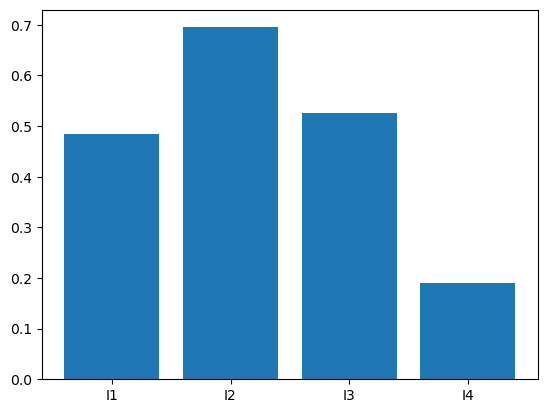

In [207]:
# step 1: calculate the means
mean_correctness = am_data[['I1', 'I2', 'I3', 'I4']].mean()

# step 2: create the plot
plt.bar(mean_correctness.index, mean_correctness.values) 

Now for the long format. I'm using am_data3 because we've already calculated the mean and saved it.

<BarContainer object of 4 artists>

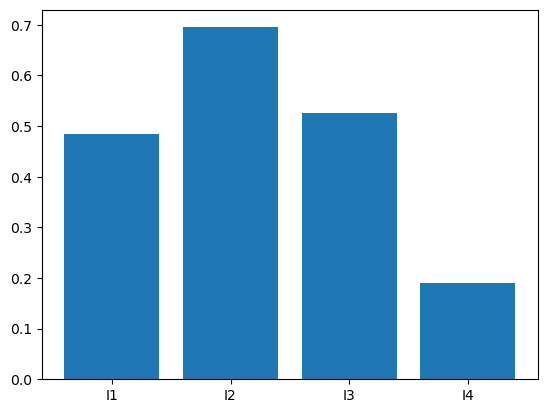

In [210]:
plt.bar(am_data3['item'], am_data3['mean'])

Now, this doesn't seem too different. But if we are plotting additional things like including error bars, the long format can be useful because remember, it was easy to calculate the standard error for an arbitrary number of columns.

Text(0.5, 1.0, 'Item correctness with 95% confidence interval')

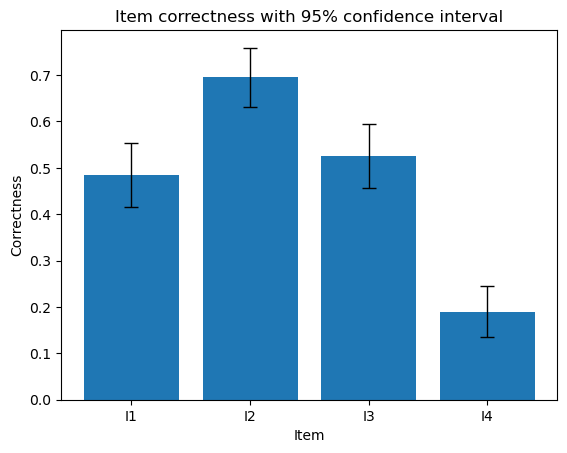

In [222]:
plt.bar(am_data3['item'], am_data3['mean'])
plt.errorbar(am_data3['item'], am_data3['mean'], yerr=1.96*am_data3['SE'], capsize=5, elinewidth=1, fmt='none', color = 'black')
plt.xlabel('Item')
plt.ylabel('Correctness')
plt.title('Item correctness with 95% confidence interval')